In [32]:
!date -I

2023-03-10


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pylab as plt
from tvb.simulator.lab import *

/home/izaak/local_repos/nostromo/tvb-adex-cleanup/tvb_library/tvb/datatypes/surfaces.py:64: UserWarning: Geodesic distance module is unavailable; some functionality for surfaces will be unavailable.
  warnings.warn(msg)


In [3]:
from adex_cleanup import configure_sim

In [7]:
sim = configure_sim('cfgs/goldman.toml', with_noise=True)

(out_t, out_d),  = sim.run(simulation_length=1500)

WARNING  File 'hemispheres' not found in ZIP.


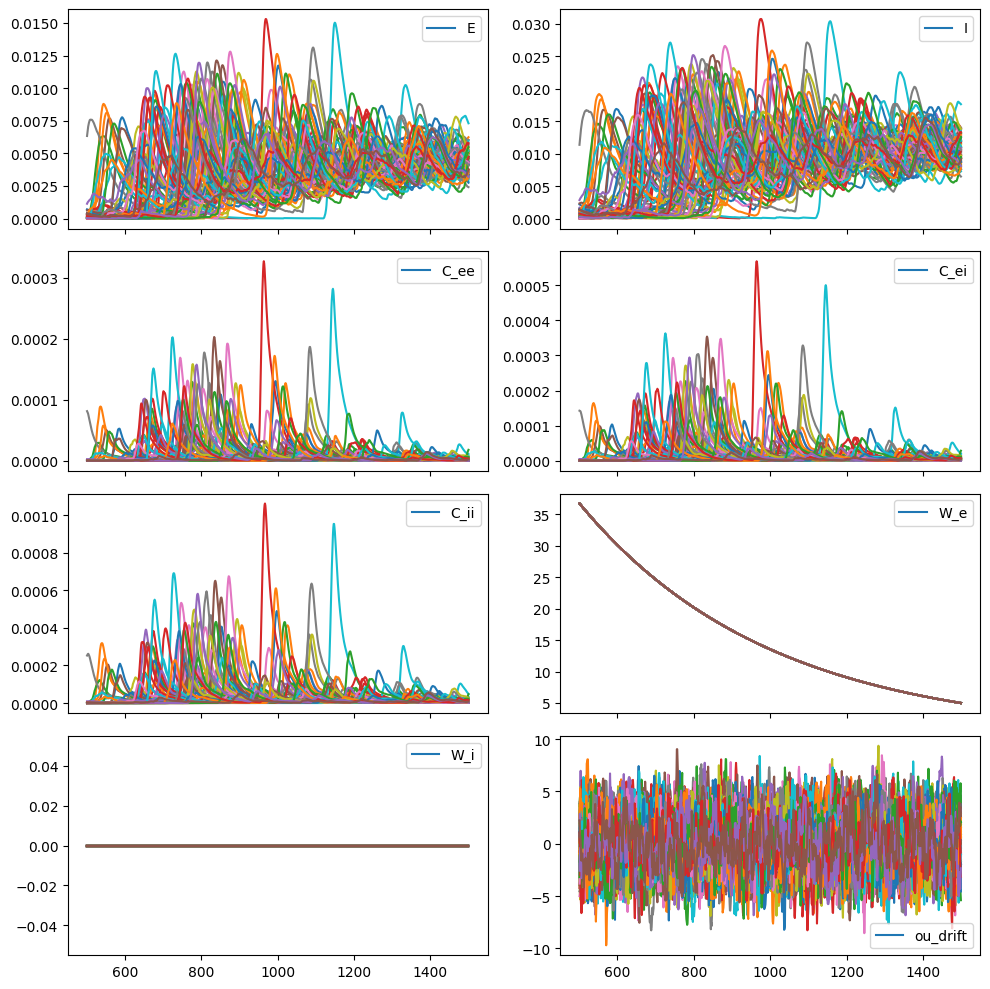

In [8]:
t0=500
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(sim.model.state_variables, axs.flatten())):
    ax.plot(out_t[t0:], out_d[t0:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

```
# %load -n cfgs/carlu.toml
[parameters]
# all these shall become numpy arrays when loaded
C_m = 200.0
E_L_e = -63.0
E_L_i = -65.0
E_e = 0.0
E_i = -80.0
K_ext_e = 400
K_ext_i = 0
N_tot = 10000
P_e = [ -0.0498, 0.00506, -0.025, 0.0014, -0.00041, 0.0105, -0.036, 0.0074, 0.0012, -0.0407, ]
P_i = [ -0.0514, 0.004, -0.0083, 0.0002, -0.0005, 0.0014, -0.0146, 0.0045, 0.0028, -0.0153, ]
Q_e = 1.5
Q_i = 5.0
T = 5.0
a_e = 0.0
a_i = 0.0
b_e = 0.0
b_i = 0.0
external_input_ex_ex = 0.315e-3
external_input_ex_in = 0.000
external_input_in_ex = 0.315e-3
external_input_in_in = 0.000
g = 0.2
g_L = 10.0
p_connect_e = 0.05
p_connect_i = 0.05
tau_OU = 5.0
tau_e = 5.0
tau_i = 5.0
tau_w_e = 500.0
tau_w_i = 1.0
weight_noise = 1e-4

[attributes]
# these are approached on a case-by-case basis
stvar = [7] 
variables_of_interest=['E', 'I', 'C_ee', 'C_ei', 'C_ii', 'W_e', 'W_i', 'ou_drift']
state_variable_range.E = [0.000, 0.000]
state_variable_range.I = [0.00, 0.00]
state_variable_range.C_ee = [0.0, 0.0]
state_variable_range.C_ei = [0.0, 0.0]
state_variable_range.C_ii = [0.0, 0.0]
state_variable_range.W_e = [0.0, 0.0] 
state_variable_range.W_i = [0.0, 0.0]
state_variable_range.ou_drift = [0.0, 0.0]
```

In [9]:
sim = configure_sim('cfgs/carlu.toml', with_noise=False)

(out_t, out_d),  = sim.run(simulation_length=1500)

WARNING  File 'hemispheres' not found in ZIP.
WARNING  random_state supplied for non-stochastic integration


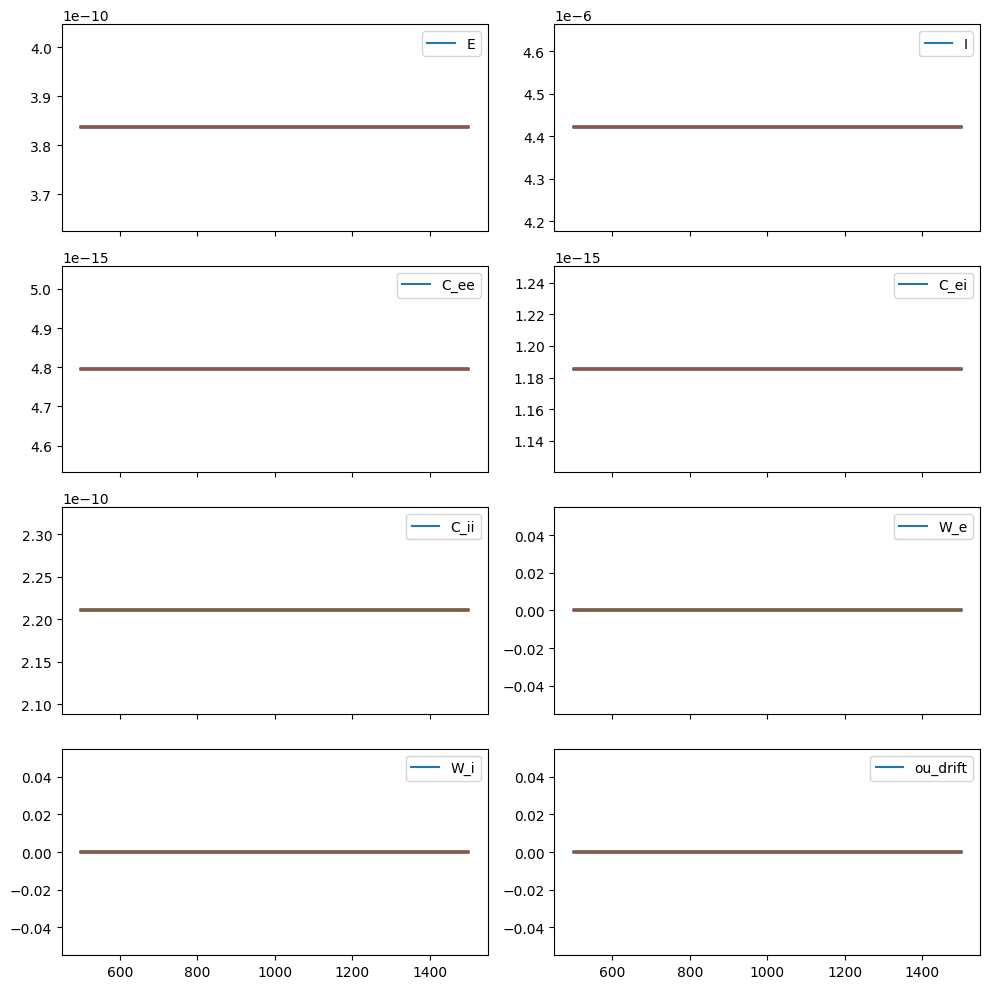

In [10]:
t0=500
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(sim.model.state_variables, axs.flatten())):
    ax.plot(out_t[t0:], out_d[t0:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [12]:
sim = configure_sim('cfgs/carlu.toml', with_noise=False, stim=True)

(out_t, out_d),  = sim.run(simulation_length=1500)

WARNING  File 'hemispheres' not found in ZIP.
WARNING  random_state supplied for non-stochastic integration


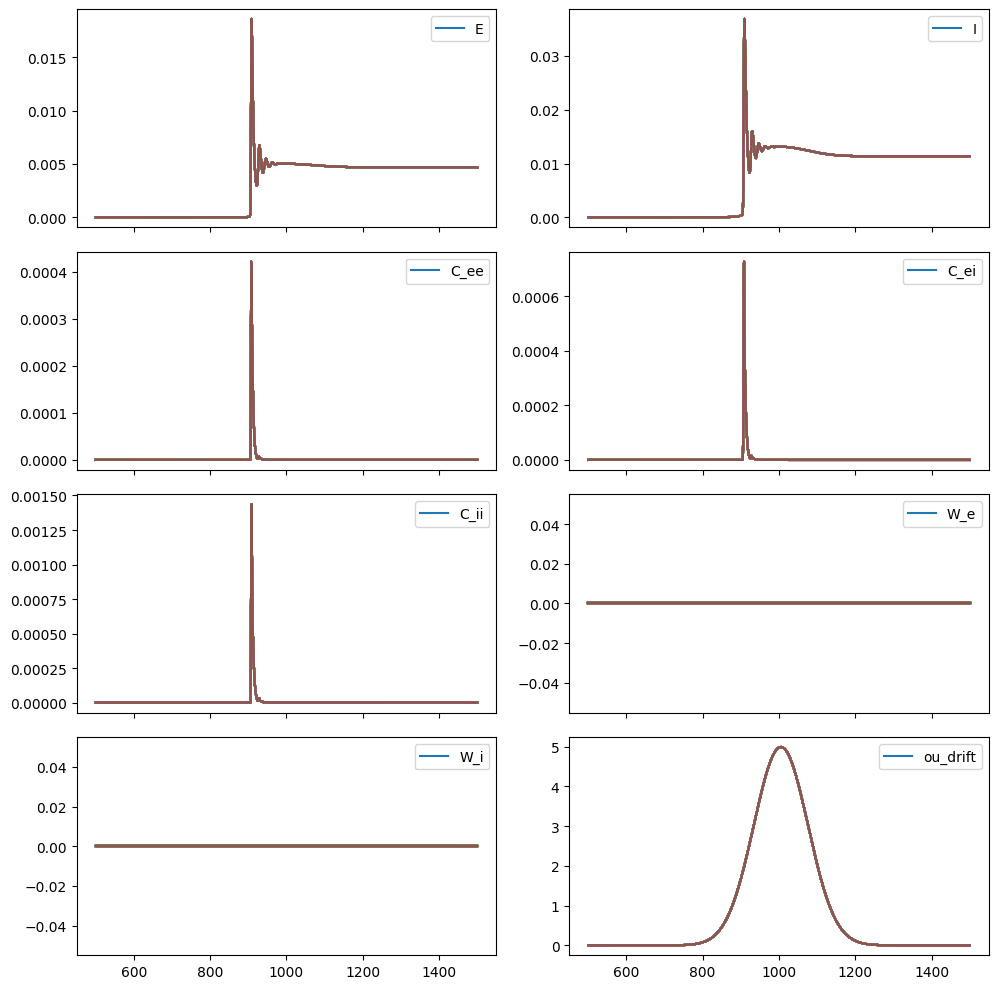

In [13]:
t0=500
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(sim.model.state_variables, axs.flatten())):
    ax.plot(out_t[t0:], out_d[t0:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [14]:
sim.stimulus.temporal.parameters

{'amp': 1.0, 't_0': 1000.0, 'T_1': 100.0, 'T_2': 100.0, 'b': 0.0}

In [15]:
sim = configure_sim('cfgs/carlu.toml', with_noise=False, stim=True,
                    stim_params={'amp': 0.5, 't_0': 1000.0, 'T_1': 100.0, 'T_2': 100.0, 'b': 1.0} )

(out_t, out_d),  = sim.run(simulation_length=1500)

WARNING  File 'hemispheres' not found in ZIP.
WARNING  random_state supplied for non-stochastic integration


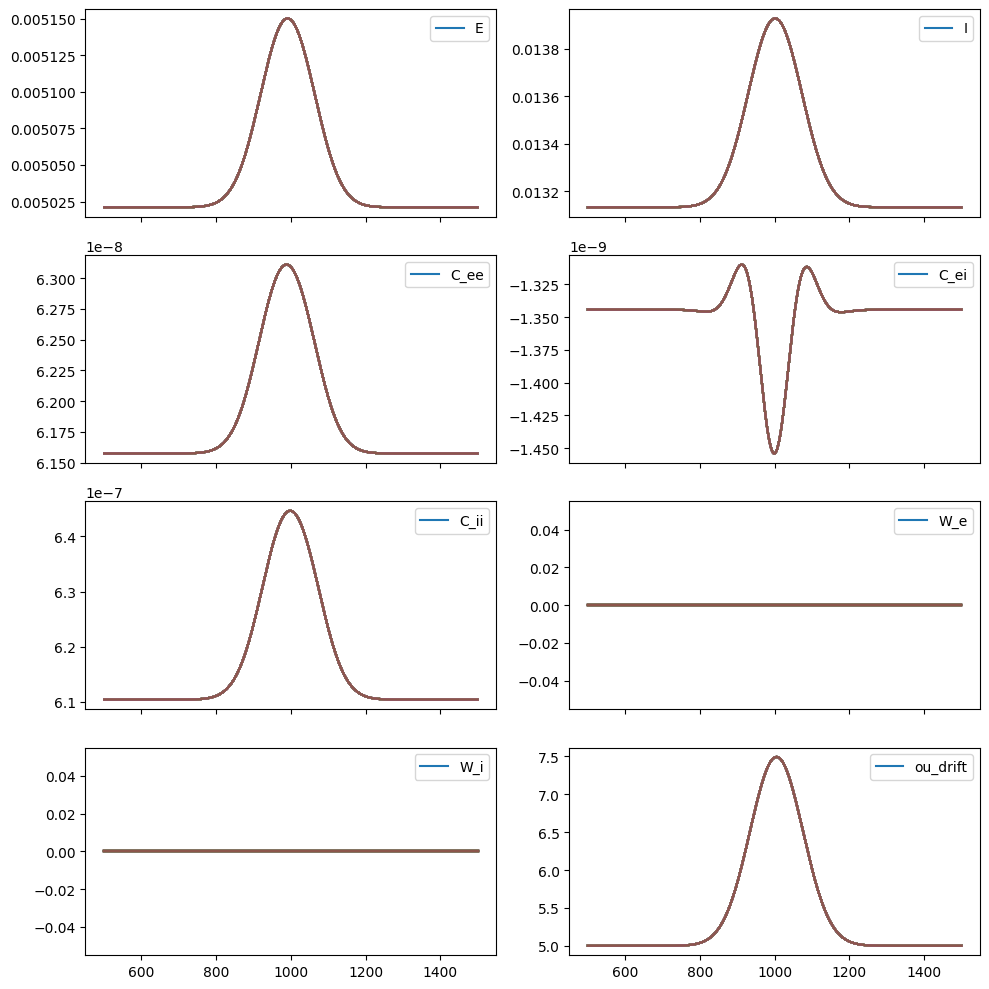

In [16]:
t0=500
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(sim.model.state_variables, axs.flatten())):
    ax.plot(out_t[t0:], out_d[t0:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [17]:
sim = configure_sim('cfgs/carlu_paper.toml', with_noise=False, stim=True,
                    stim_params={'amp': 0.5, 't_0': 1000.0, 'T_1': 100.0, 'T_2': 100.0, 'b': 1.0} )

(out_t, out_d),  = sim.run(simulation_length=1500)

WARNING  File 'hemispheres' not found in ZIP.
WARNING  random_state supplied for non-stochastic integration


In [18]:
sim.model.b_e

array([60.])

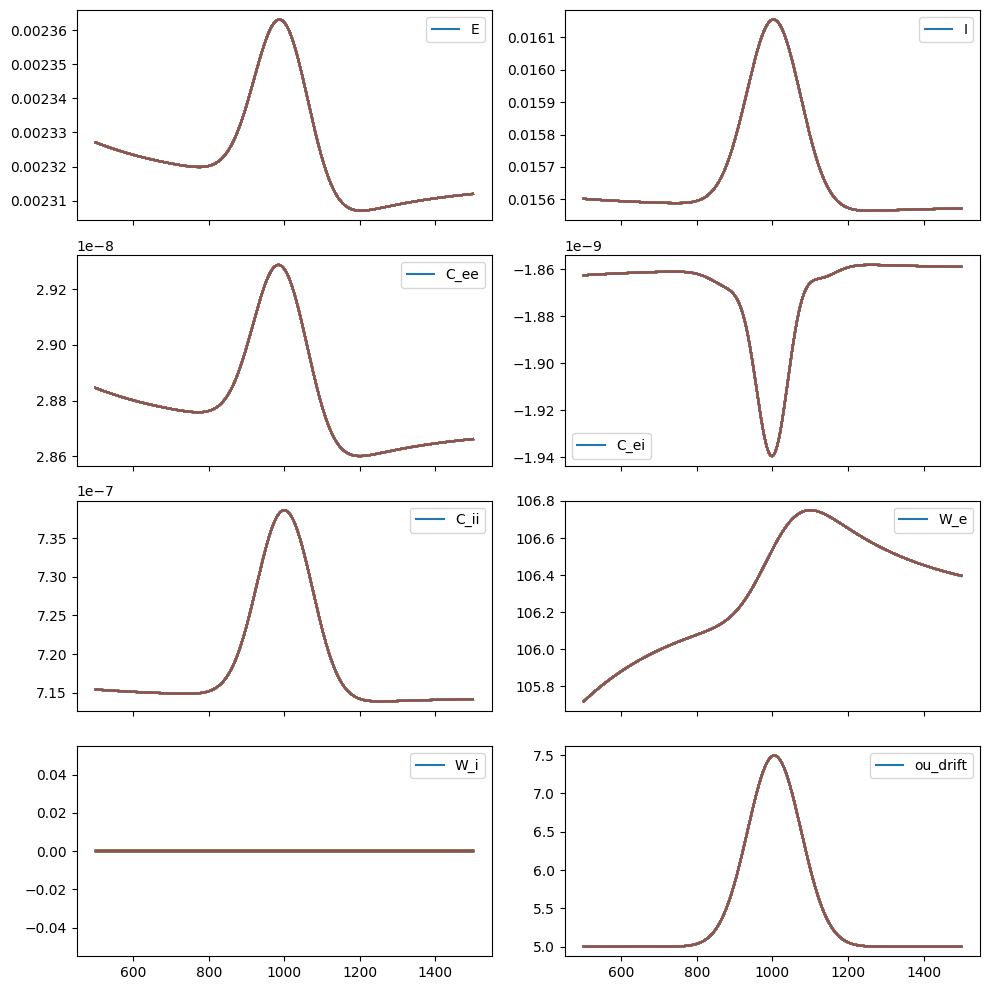

In [19]:
t0=500
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(sim.model.state_variables, axs.flatten())):
    ax.plot(out_t[t0:], out_d[t0:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [20]:
sim = configure_sim('cfgs/carlu_paper.toml', with_noise=False, stim=False,
                    stim_params={'amp': 0.5, 't_0': 1000.0, 'T_1': 100.0, 'T_2': 100.0, 'b': 1.0} )

(out_t, out_d),  = sim.run(simulation_length=2500)

WARNING  File 'hemispheres' not found in ZIP.
WARNING  random_state supplied for non-stochastic integration


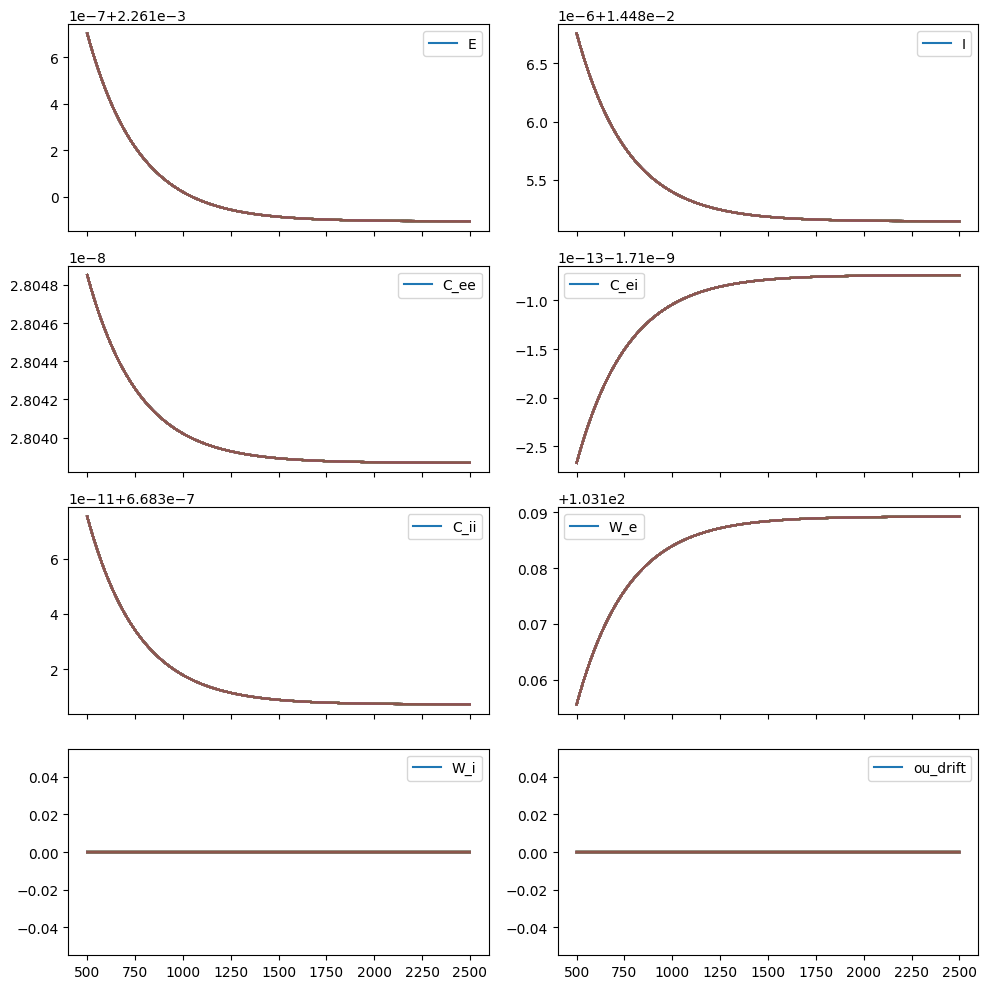

In [21]:
t0=500
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(sim.model.state_variables, axs.flatten())):
    ax.plot(out_t[t0:], out_d[t0:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [22]:
sim = configure_sim('cfgs/carlu_paper.toml', with_noise=False, stim=False,
                    stim_params={'amp': 0.5, 't_0': 1000.0, 'T_1': 100.0, 'T_2': 100.0, 'b': 1.0} )

(out_t, out_d),  = sim.run(simulation_length=2500)

WARNING  File 'hemispheres' not found in ZIP.
WARNING  random_state supplied for non-stochastic integration


In [23]:
sim.model.state_variable_range['W_e']

[103.0, 103.0]

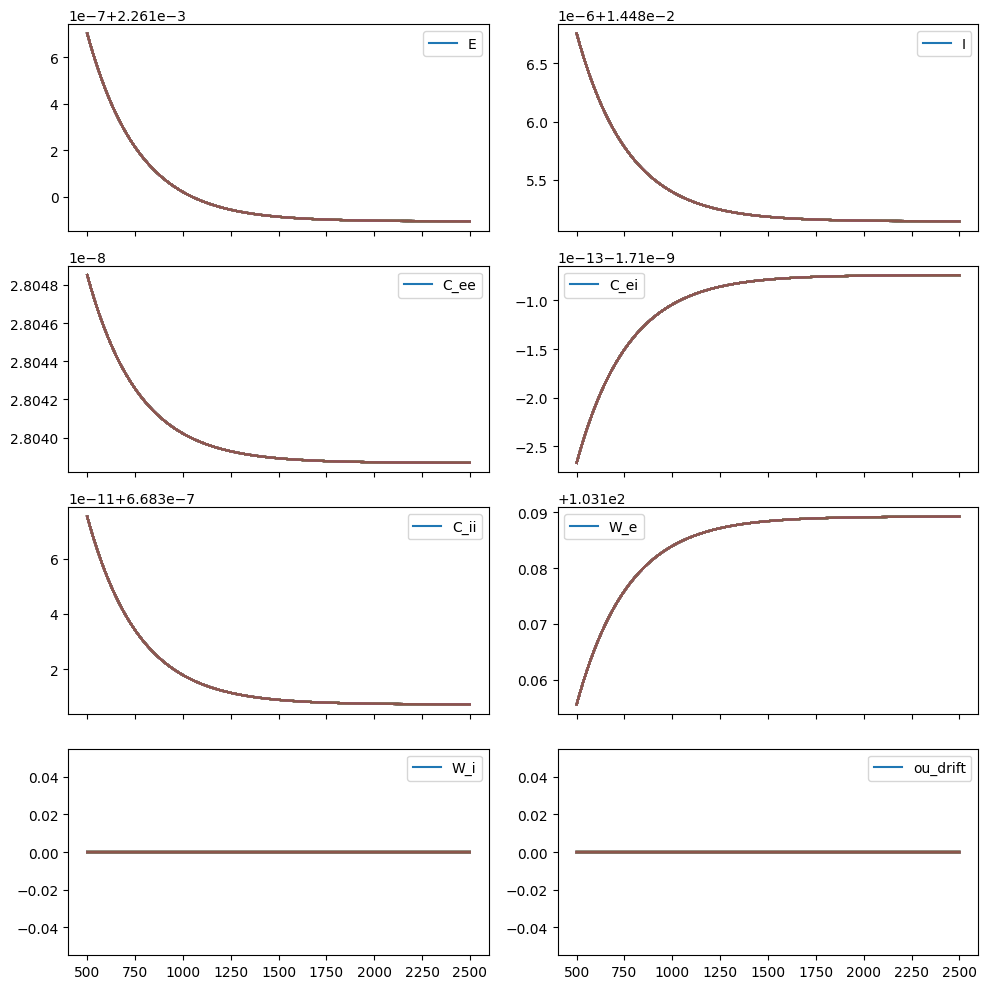

In [24]:
t0=500
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(sim.model.state_variables, axs.flatten())):
    ax.plot(out_t[t0:], out_d[t0:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [25]:
sim = configure_sim('cfgs/carlu_paper.toml', with_noise=False, stim=False,
                    stim_params={'amp': 0.5, 't_0': 1000.0, 'T_1': 100.0, 'T_2': 100.0, 'b': 1.0} )

(out_t, out_d),  = sim.run(simulation_length=2500)

WARNING  File 'hemispheres' not found in ZIP.
WARNING  random_state supplied for non-stochastic integration


In [26]:
sim.model.state_variable_range

{'E': [0.0022, 0.0022],
 'I': [0.01448, 0.01448],
 'C_ee': [0.0, 0.0],
 'C_ei': [0.0, 0.0],
 'C_ii': [0.0, 0.0],
 'W_e': [103.0, 103.0],
 'W_i': [0.0, 0.0],
 'ou_drift': [0.0, 0.0]}

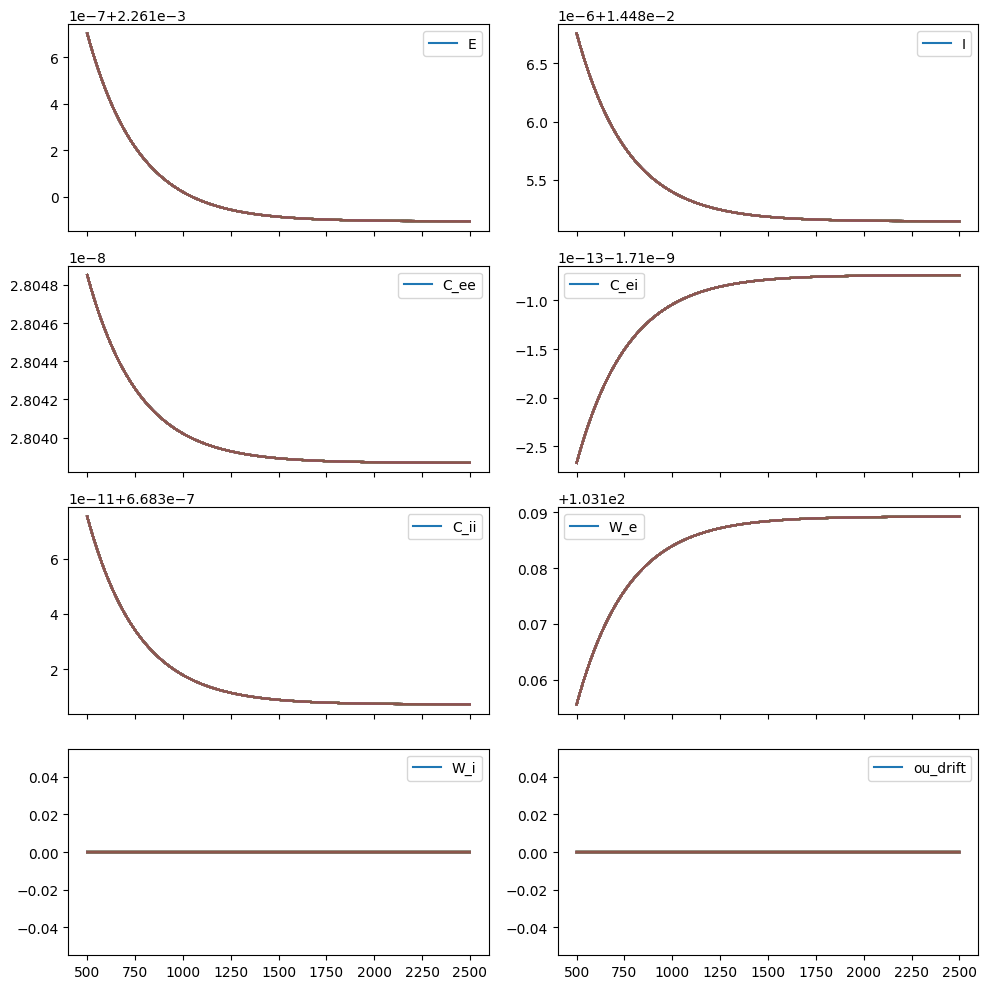

In [27]:
t0=500
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(sim.model.state_variables, axs.flatten())):
    ax.plot(out_t[t0:], out_d[t0:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [28]:
sim = configure_sim('cfgs/carlu_paper.toml', with_noise=False, stim=True,
                    stim_params={'amp': 0.5, 't_0': 1500.0, 'T_1': 100.0, 'T_2': 100.0, 'b': 0.0} )

(out_t, out_d),  = sim.run(simulation_length=2500)

WARNING  File 'hemispheres' not found in ZIP.
WARNING  random_state supplied for non-stochastic integration


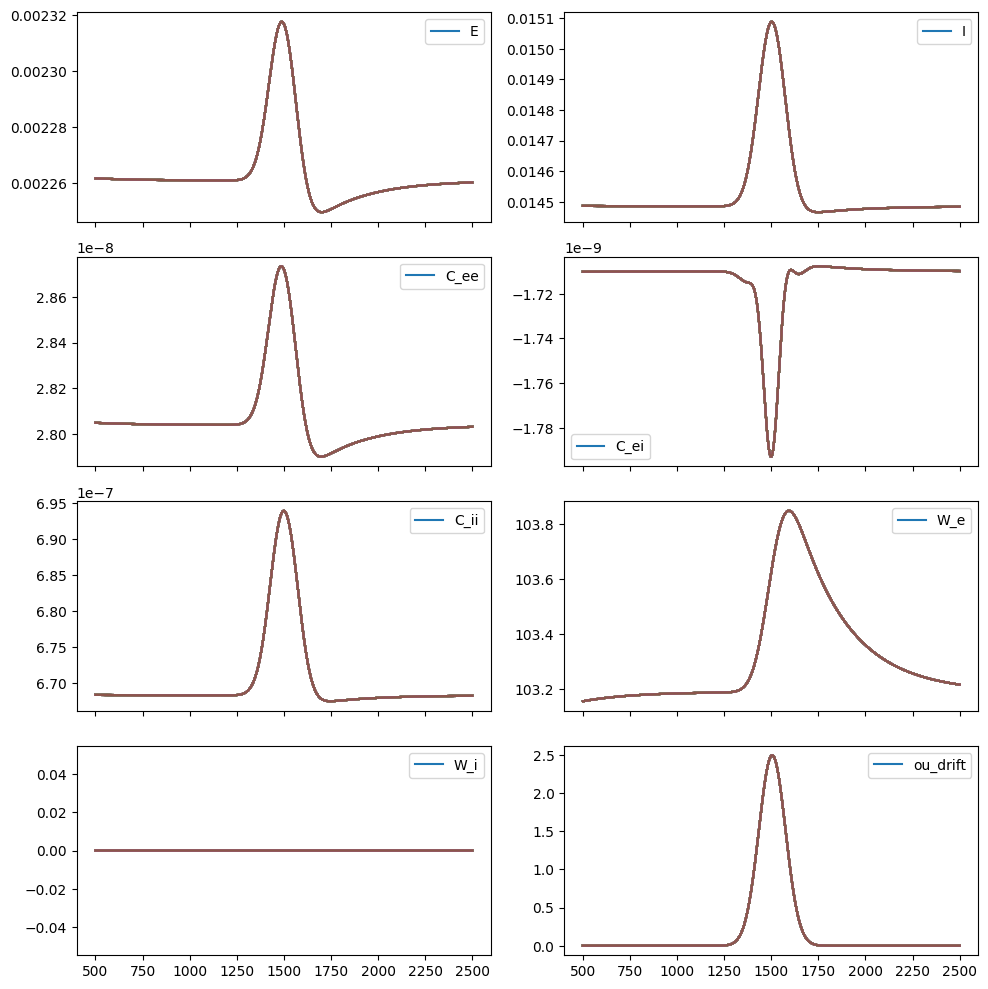

In [29]:
t0=500
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,10), sharex=True)
for i,(var, ax) in enumerate(zip(sim.model.state_variables, axs.flatten())):
    ax.plot(out_t[t0:], out_d[t0:,i,:,0])
    ax.legend(labels=[var])
fig.tight_layout()

In [30]:
# %load -n 'cfgs/carlu_paper.toml'
[parameters]
# all these shall become numpy arrays when loaded
C_m = 150.0
E_L_e = -65.0
E_L_i = -65.0
E_e = 0.0
E_i = -80.0
K_ext_e = 400
K_ext_i = 100 # this is weirdly set to 0 by default as the external drive is excitatory
N_tot = 10000
P_e = [ -49.8e-3, 5.06e-3,  -23.4e-3,  2.3e-3, -0.41e-3, 10.5e-3, -36.6e-3, 7.4e-3, 1.2e-3, -40.7e-3 ]
P_i = [ -51.5e-3,  4.0e-3,  -8.35e-3, 0.24e-3, -0.50e-3, 1.43e-3, -14.7e-3, 4.5e-3, 2.8e-3, -15.3e-3 ]
Q_e = 1.5
Q_i = 5.0
T = 5.0
a_e = 4.0
a_i = 0.0
b_e = 60.0
b_i = 0.0
external_input_ex_ex = 4e-3#0.315e-3
external_input_ex_in = 0.000
external_input_in_ex = 4e-3#0.315e-3
external_input_in_in = 0.000
g = 0.2
g_L = 10.0
p_connect_e = 0.05
p_connect_i = 0.05
tau_OU = 5.0
tau_e = 5.0
tau_i = 5.0
tau_w_e = 500.0
tau_w_i = 1.0
weight_noise = 1e-4

[attributes]
# these are approached on a case-by-case basis
stvar = [7] 
variables_of_interest=['E', 'I', 'C_ee', 'C_ei', 'C_ii', 'W_e', 'W_i', 'ou_drift']
state_variable_range.E = [0.0022, 0.0022] 
state_variable_range.I = [0.01448, 0.01448]
state_variable_range.C_ee = [0.0, 0.0]
state_variable_range.C_ei = [0.0, 0.0]
state_variable_range.C_ii = [0.0, 0.0]
state_variable_range.W_e = [103.0, 103.0] 
state_variable_range.W_i = [0.0, 0.0]
state_variable_range.ou_drift = [0.0, 0.0]

